# Loading optimized parameter for model building and prediction
Here, in order to show a basic procedure to predict new complex data, we take a complex from the emission data set as an example, following the generation of '13cn' complex feature set.

## Data preparation

In [19]:
import os 
print('old:  ',os.getcwd())
os.chdir('./')
print('new:  ',os.getcwd())

old:   d:\00ketizu\ir_ja_writting4\github\op_pred
new:   d:\00ketizu\ir_ja_writting4\github\op_pred


### Browse ligand structures of the emission data set

In [2]:
from ligand_data import cn_list, nn_list
from ligand_data import y_test_ori,y_test_re
print(y_test_re)

['101_03', '95_08', '94_41', '94_06', '29_47', '41_03', '105_02', '02_27', '48_40', '81_16', '73_16', '33_33', '107_47', '104_47', '11_20', '74_47', '34_24', '49_41', '11_34', '102_41', '75_24', '95_05', '12_40', '80_42', '01_42', '49_02', '106_41', '05_03', '38_27', '35_01', '48_43', '74_01', '73_02', '40_05', '63_06', '04_24', '14_40', '71_24', '73_24', '106_42', '65_26', '02_06', '94_43', '03_01', '39_02', '103_06', '94_24', '108_06', '64_41', '66_02', '66_47', '107_08', '02_16', '66_08', '38_08', '03_40', '29_34', '102_42', '12_08', '13_34', '37_03', '05_01', '65_47', '79_40', '11_06', '21_02', '68_03', '80_27', '39_01', '70_05', '79_05', '03_33', '79_47', '106_03', '41_26', '63_41', '04_05', '38_42', '77_05', '67_43', '101_02', '108_42', '49_40', '14_27', '109_41', '04_34', '13_24', '102_16', '34_06', '42_05', '77_20', '44_01', '73_33', '13_42', '46_40', '42_27', '05_33', '70_16', '66_42', '77_24', '40_40', '28_20', '73_40', '64_01', '77_26', '72_06', '44_33', '73_01', '37_33', '1

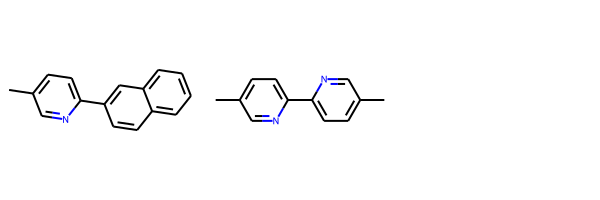

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import MolFromSmiles,Draw

show_str = '101_03'
cn_index = int(show_str.split('_')[0])
nn_index = int(show_str.split('_')[1])
cn_mol = MolFromSmiles(cn_list[cn_index])
nn_mol = MolFromSmiles(nn_list[nn_index])
Draw.MolsToGridImage([cn_mol,nn_mol])

### Generating ligand fingerprints
Generating type '13' ligand features.

In [4]:
import numpy as np
import pandas as pd
cn_bit_fp = np.zeros((1,))
cn_bit_efp = np.zeros((1,))
cn_info_fp=dict()
cn_info_efp=dict()
cn_fp =AllChem.GetMorganFingerprintAsBitVect(cn_mol,4,nBits=1024,bitInfo = cn_info_fp)
cn_efp= AllChem.GetMorganFingerprintAsBitVect(cn_mol,4,nBits=1024,useFeatures=True,bitInfo = cn_info_efp)
DataStructs.ConvertToNumpyArray(cn_fp,cn_bit_fp)
DataStructs.ConvertToNumpyArray(cn_efp,cn_bit_efp)
cn_bit_fp = list(cn_bit_fp)
cn_bit_efp = list(cn_bit_efp)
# print(len(list(cn_bit_fp)),cn_bit_fp)
cn_tot_fp = pd.DataFrame(
    data = [cn_bit_fp+cn_bit_efp],
    index=[str(cn_index)],
    columns = ['FP'+str(i+1) for i in range(1024)]+['ExtFP'+str(i+1) for i in range(1024)])

In [5]:
nn_bit_fp = np.zeros((1,))
nn_bit_efp = np.zeros((1,))
nn_info_fp=dict()
nn_info_efp=dict()
nn_fp =AllChem.GetMorganFingerprintAsBitVect(nn_mol,4,nBits=1024,bitInfo = nn_info_fp)
nn_efp= AllChem.GetMorganFingerprintAsBitVect(nn_mol,4,nBits=1024,useFeatures=True,bitInfo = nn_info_efp)
DataStructs.ConvertToNumpyArray(nn_fp,nn_bit_fp)
DataStructs.ConvertToNumpyArray(nn_efp,nn_bit_efp)
nn_bit_fp = list(nn_bit_fp)
nn_bit_efp = list(nn_bit_efp)
nn_tot_fp = pd.DataFrame(
    data = [nn_bit_fp+nn_bit_efp],
    index=[str(nn_index)],
    columns = ['FP'+str(i+1) for i in range(1024)]+['ExtFP'+str(i+1) for i in range(1024)])

### Combining ligand features to complex features, along with preprocessing
ligand feature set '13' -> complex feature set '13cn'
comparing new generated data with previous complex feature sets.

In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
show_fp = pd.DataFrame(
    data = [
        cn_bit_fp+cn_bit_efp+\
        cn_bit_fp+cn_bit_efp+nn_bit_fp+nn_bit_efp],
    index= ['101_03'],
    columns = ['FP'+str(i+1)+'_0' for i in range(1024)]+['ExtFP'+str(i+1)+'_0' for i in range(1024)]+\
              ['FP'+str(i+1)+'_1' for i in range(1024)]+['ExtFP'+str(i+1)+'_1' for i in range(1024)]+\
              ['FP'+str(i+1)+'_2' for i in range(1024)]+['ExtFP'+str(i+1)+'_2' for i in range(1024)]
)
complex_df = pd.read_csv('./irja_complex_x/Tcomplexdata__fr_4_s_n.csv',index_col=[0])
complex_df.index = ['_'.join(i.split('_')[:2]) for i in complex_df.index.tolist()]
print(all(show_fp.loc[['101_03'],:].values[0]==complex_df.loc[['101_03'],:].values[0]))


x_train_ori = pd.read_csv('./result__slf/xy__fr_4_s_n__emlb__train_ori__.csv',index_col=[0]).iloc[:,:-1]
x_holdout_ori = pd.read_csv('./result__slf/xy__fr_4_s_n__emlb__holdout_ori__.csv',index_col=[0]).iloc[:,:-1]
c_train = complex_df.loc[x_train_ori.index.tolist(),:]

mms = MinMaxScaler()
mms.fit(c_train)
show_fp = pd.DataFrame(data=mms.transform(show_fp),index=show_fp.index.tolist(),columns=show_fp.columns.tolist())
mms = StandardScaler()
mms.fit(c_train)
show_fp = pd.DataFrame(data=mms.transform(show_fp),index=show_fp.index.tolist(),columns=show_fp.columns.tolist())

show_fp_values = show_fp.loc[['101_03'],x_holdout_ori.columns.tolist()].values[0]
x_holdout_values = x_holdout_ori.loc[['101_03'],:].values[0]
print(not([
    [show_fp_values[i],x_holdout_values[i],
     abs(show_fp_values[i]-x_holdout_values[i])] for i in range(len(x_holdout_ori.columns.tolist())) if (
     abs(show_fp_values[i]-x_holdout_values[i])>1e-10)]))

True
True


## Load data set and model paremeters of a base learner

### Load learner parameters and defination

In [8]:
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,ShuffleSplit,learning_curve
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

from sklearn.inspection import permutation_importance

learner_reg_dict={
    'rf':RandomForestRegressor(random_state=42),
    'gbrt':GradientBoostingRegressor(random_state=42),
    'lgbm':lgb.LGBMRegressor(),
    'la':Lasso(random_state=42,max_iter=100000),
    'mlr':LinearRegression(),
}
def learner_ret(reg_str,kernel_str):
    if kernel_str:
        if reg_str=='svm':
            return SVR(kernel=kernel_str)
        elif reg_str=='krr':
            return KernelRidge(kernel=kernel_str)
        else:
            print("ERROR    reg_str==?")
    else:
        return learner_reg_dict[reg_str]


model_dict = {
    ('slf', 'emlb', 'dl1ss', 'dl2ss', 'fr_4_s_n', 'des_corr', '70', 'all'):[
        {'lgbm':{'every_rmse': 15.464175140588118, 'every_r2': 0.8153522172843124, 'train_rmse': 9.14731317875769, 'train_r2': 0.9360355896993406, 'para_dict': {'learning_rate': [0.079], 'max_depth': [12], 'n_estimators': [290], 'num_leaves': [20]}}},
        ['./result__slf/xy__fr_4_s_n__emlb__train_ori__.csv', './snresult_slf/result_emlb/slf__dl1ss_fr_4_s_n_x_test_ori_.csv', './snresult_slf/result_emlb/slf__dl1ss_fr_4_s_n_y_test_ori_.csv', './snresult_slf/result_emlb/slf_dl1ss_dl2ss_des_corr_fr_4_s_n_x_test_re_.csv', './snresult_slf/result_emlb/slf_dl1ss_dl2ss_des_corr_y_test_re_.csv', './snresult_slf/result_emlb/slf_emlb_fr_4_s_n_dl1ss_dl2ss_des_corr_70_x_train_rew_.csv', './snresult_slf/result_emlb/slf_dl1ss_dl2ss_des_corr_y_train_rew_.csv', ['FP11_0', 'FP74_0', 'FP81_0', 'FP89_0', 'FP151_0', 'FP245_0', 'FP319_0', 'FP353_0', 'FP486_0', 'FP531_0', 'FP544_0', 'FP599_0', 'FP609_0', 'FP632_0', 'FP676_0', 'FP734_0', 'FP743_0', 'FP817_0', 'FP874_0', 'FP952_0', 'ExtFP118_0', 'ExtFP196_0', 'ExtFP214_0', 'ExtFP591_0', 'ExtFP681_0', 'ExtFP774_0', 'ExtFP929_0', 'FP47_1', 'FP105_1', 'FP115_1', 'FP217_1', 'FP237_1', 'FP304_1', 'FP367_1', 'FP430_1', 'FP584_1', 'FP634_1', 'FP755_1', 'FP843_1', 'ExtFP9_1', 'ExtFP426_1', 'ExtFP512_1', 'ExtFP634_1', 'ExtFP826_1', 'ExtFP827_1', 'ExtFP836_1', 'ExtFP943_1', 'FP64_2', 'FP65_2', 'FP91_2', 'FP295_2', 'FP353_2', 'FP550_2', 'FP567_2', 'FP743_2', 'FP760_2', 'FP860_2', 'FP915_2', 'ExtFP4_2', 'ExtFP18_2', 'ExtFP81_2', 'ExtFP330_2', 'ExtFP372_2', 'ExtFP393_2', 'ExtFP910_2', 'ExtFP920_2', 'ExtFP977_2']]
    ]
}

### Re-training a base learner and predicting complex feature sets

In [16]:
for i in list(model_dict.keys()):
    data_list = model_dict[i][1]
    x_test_ori = pd.read_csv(data_list[1],index_col=[0]).loc[:,data_list[7]]
    y_test_ori = pd.read_csv(data_list[2],index_col=[0]).values.ravel()
    x_test_re = pd.read_csv(data_list[3],index_col=[0]).loc[:,data_list[7]]
    y_test_re = pd.read_csv(data_list[4],index_col=[0]).values.ravel()
    x_train_rew = pd.read_csv(data_list[5],index_col=[0]).loc[:,data_list[7]]
    y_train_rew = pd.read_csv(data_list[6],index_col=[0]).values.ravel()
    show_fp = show_fp.loc[:,data_list[7]]
    for j in model_dict[i][0]:
        reg_str = re.split(r'_+',j)[0]
        if len(re.split(r'_+',j))==2:
            kernel_str = re.split(r'_+',j)[1]
        else:
            kernel_str=''
        if model_dict[i][0][j]['para_dict']:
            m_f = GridSearchCV(
                learner_ret(reg_str,kernel_str),
                param_grid=model_dict[i][0][j]['para_dict'],
                cv=ShuffleSplit(n_splits=5,train_size=0.8,test_size=0.2,random_state=24),
                scoring='neg_root_mean_squared_error',
                n_jobs=-1
            ).fit(x_train_rew,y_train_rew)
            curr_estimator = m_f.best_estimator_
        else:
            m_f=learner_ret(reg_str,kernel_str)
            m_f.fit(x_train_rew,y_train_rew)
            curr_estimator = m_f
        curr_rmse = float(np.sqrt(mean_squared_error(y_train_rew,curr_estimator.predict(x_train_rew))))
        curr_r2 = float(r2_score(y_train_rew,curr_estimator.predict(x_train_rew)))

        every_ori_predict = curr_estimator.predict(x_test_ori)
        every_ori_rmse = float(np.sqrt(mean_squared_error(y_test_ori,every_ori_predict)))
        every_ori_r2 = float(r2_score(y_test_ori,every_ori_predict))
        
        every_re_predict = curr_estimator.predict(x_test_re)
        every_re_rmse = float(np.sqrt(mean_squared_error(y_test_re,every_re_predict)))
        every_re_r2 = float(r2_score(y_test_re,every_re_predict))
        print(i,j)
        print(
            ' training set : ',curr_rmse,curr_r2,'\n',
            'duality set  : ',every_ori_rmse,every_ori_r2,'\n',
            'test set     : ',every_re_rmse,every_re_r2
        )
        print(
            'new data prediction : ',curr_estimator.predict(show_fp.loc[:,])
        )

        # pi_obj = permutation_importance(curr_estimator,x_train_rew,y_train_rew,n_repeats=10,random_state=24,n_jobs=8)
        # pi_result = pi_obj.importances_mean
        # pi_dict = {}
        # x_col = x_train_rew.columns.tolist()
        # for k in range(len(pi_result)):
        #     pi_dict[x_col[k]] = float(pi_result[k])
        # pi_dict = sorted(pi_dict.items(),key = lambda kv:(kv[1],kv[0]))
        # pi_dict.reverse()
        # print(pi_dict)

        
        
        # sam_num,train_sco,test_sco = learning_curve(
        #     m_f,
        #     x_train_rew,y_train_rew,
        #     cv=ShuffleSplit(n_splits=5,train_size=0.8,test_size=0.2,random_state=24),
        #     n_jobs=-1,
        #     scoring = 'neg_root_mean_squared_error'
        #     # scoring = 'r2'
        # )      
        # train_sco=[np.mean(i) for i in train_sco]
        # test_sco=[np.mean(i) for i in test_sco]
        # plt.figure()
        # plt.plot(sam_num,
        #         train_sco,
        #         linestyle = '-',
        #         linewidth = 2,
        #         color = 'blue',
        #         marker = 'o',
        #         markersize = 3,
        #         markerfacecolor='blue')
        # plt.plot(sam_num,
        #         test_sco,
        #         linestyle = '-',
        #         linewidth = 2,
        #         color = 'red',
        #         marker = 'o',
        #         markersize = 3,
        #         markerfacecolor='red')
        # plt.xticks(rotation=90)
        # plt.yticks()
        # plt.show()

        # print('\n\n')
        
        
        
        
        
 

('slf', 'emlb', 'dl1ss', 'dl2ss', 'fr_4_s_n', 'des_corr', '70', 'all') lgbm
 training set :  9.14731317875769 0.9360355896993406 
 duality set  :  15.80626459346221 0.8154749685373468 
 test set     :  15.464175140588118 0.8153522172843124
new data prediction :  [585.04403933]
